In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
confustion_matrix_filename = "/result_outputs/confusion_matrix.npy"
permutation = np.array([9, 2, 3, 4, 7, 5, 0, 6, 8, 1])
names = ["linear_unbalanced_1", 
         "linear_unbalanced_2", 
         "balanced", 
         "balanced_5000", 
         "balanced_1600", 
         "balanced_800", 
         "balanced_400", 
         "balanced_200",
         "balanced_100", 
         "balanced_50", 
         "balanced_25", 
         "balanced_10", 
         "balanced_5", 
         "expo_unbalance", 
         "expo_unbalance_2560to5", 
         "expo_unbalance_5000to1",
         "cut_unbalance_4890or25", 
         "linear_unbalance_1020to3"]
shapes = [list(range(5000,0,-500)), 
          list(range(4100, 1100, -300)), 
          [2750]*10,
          [5000]*10,
          [1600]*10,
          [800]*10,
          [400]*10,
          [200]*10,
          [100]*10,
          [50]*10,
          [25]*10,
          [10]*10,
          [5]*10,
          [5000, 4287, 3673, 3148, 2699, 2312, 1982, 1699, 1454, 1246],
          [2560, 1280, 640, 320, 160, 80, 40, 20, 10, 5],
          [5000, 2000, 800, 320, 128, 51, 20, 8, 3, 1],
          [4890, 25, 25, 25, 25, 25, 25, 25, 25, 25],
          [1020, 907, 794, 681, 568, 455, 342, 229, 116, 3]]
rescaled_shapes = [2560]

In [7]:
def get_table_from_confusion_martix(confusion_martix):
    result = {"FP":[-1]*10, "FN":[-1]*10}
    for c in range(0,10):
        TP = confusion_martix[c][c]
        result["FP"][c] = np.sum(confusion_martix[:,c]) - TP
        result["FN"][c] = np.sum(confusion_martix[c,:]) - TP
    return result

In [4]:
experment_name = "CIFAR10_Custom10_balan5000"
m =np.load(experment_name + confustion_matrix_filename)
m

array([[862.,  10.,  29.,  18.,   9.,   3.,   4.,   9.,  30.,  26.],
       [  9., 926.,   1.,   3.,   0.,   1.,   4.,   1.,  11.,  44.],
       [ 43.,   2., 789.,  43.,  36.,  27.,  31.,  20.,   5.,   4.],
       [ 28.,   4.,  39., 677.,  37., 128.,  41.,  25.,  12.,   9.],
       [ 17.,   3.,  51.,  48., 799.,  30.,  24.,  20.,   6.,   2.],
       [  8.,   5.,  31., 142.,  28., 735.,  15.,  24.,   6.,   6.],
       [  8.,   5.,  28.,  41.,  16.,  14., 873.,   4.,   6.,   5.],
       [ 10.,   1.,  20.,  30.,  30.,  31.,   2., 864.,   5.,   7.],
       [ 39.,  20.,   5.,   8.,   2.,   4.,   1.,   3., 901.,  17.],
       [ 14.,  53.,   9.,   5.,   0.,   4.,   3.,   5.,  17., 890.]])

In [8]:
get_table_from_confusion_martix(m)

{'FP': [176.0, 103.0, 213.0, 338.0, 158.0, 242.0, 125.0, 111.0, 98.0, 120.0],
 'FN': [138.0, 74.0, 211.0, 323.0, 201.0, 265.0, 127.0, 136.0, 99.0, 110.0]}

In [59]:
experment_names = ["MNIST_Custom05_balan400", "MNIST_cut_unbalance_4890or25", "MNIST_linear_unbalance_1020to3", "MNIST_expo_unbalance_2560to5", "MNIST_expo_unbalance_5000to1"]
FPs = []
FNs = []
for e in experment_names:
    print(e)
    rates = get_table_from_confusion_martix(np.load(e + confustion_matrix_filename))
    print('FP: '+str(rates['FP']))
    FPs.append(rates['FP'])
    print('FN: '+str(rates['FN']))
    FNs.append(rates['FN'])
    print()
    


MNIST_Custom05_balan400
FP: [16.0, 9.0, 16.0, 16.0, 8.0, 19.0, 13.0, 29.0, 12.0, 15.0]
FN: [6.0, 11.0, 12.0, 14.0, 15.0, 10.0, 16.0, 16.0, 18.0, 35.0]

MNIST_cut_unbalance_4890or25
FP: [28.0, 29.0, 48.0, 43.0, 12.0, 75.0, 517.0, 70.0, 72.0, 97.0]
FN: [94.0, 52.0, 105.0, 95.0, 179.0, 137.0, 1.0, 87.0, 131.0, 110.0]

MNIST_linear_unbalance_1020to3
FP: [0.0, 21.0, 65.0, 13.0, 13.0, 30.0, 541.0, 32.0, 16.0, 78.0]
FN: [654.0, 5.0, 12.0, 12.0, 44.0, 9.0, 4.0, 20.0, 37.0, 12.0]

MNIST_expo_unbalance_2560to5
FP: [1.0, 45.0, 102.0, 42.0, 7.0, 23.0, 419.0, 10.0, 0.0, 580.0]
FN: [385.0, 5.0, 13.0, 23.0, 196.0, 49.0, 4.0, 151.0, 399.0, 4.0]

MNIST_expo_unbalance_5000to1
FP: [0.0, 64.0, 412.0, 77.0, 2.0, 22.0, 760.0, 11.0, 0.0, 1230.0]
FN: [945.0, 2.0, 10.0, 23.0, 420.0, 92.0, 2.0, 173.0, 909.0, 2.0]



In [42]:
distribution[permutation]

array([   1,  800,  320,  128,    8,   51, 5000,   20,    3, 2000])

In [70]:
def plot_table(title, rows, columns, cells):
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.axis('tight')
    the_table = ax.table(cellText=cells,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='center')
    fig.tight_layout()
    ax.set_title(title)
    plt.show()
    

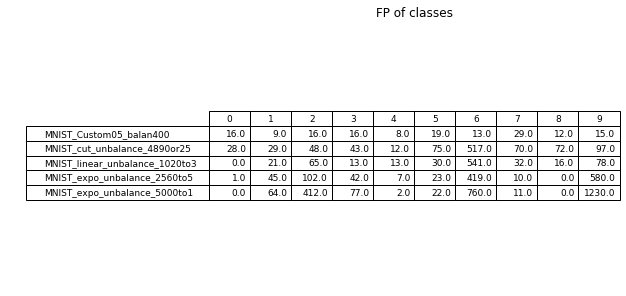

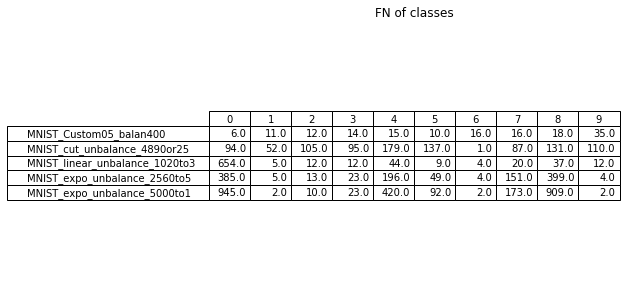

In [71]:
plot_table('FP of classes', experment_names, [str(x) for x in range(0,10)], FPs)
plot_table('FN of classes', experment_names, [str(x) for x in range(0,10)], FNs)

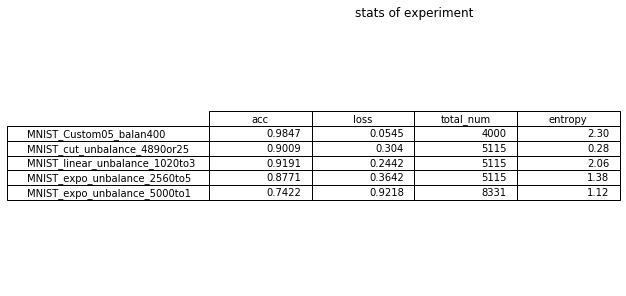

In [75]:
distributions = [
    [400]*10,
    [4890, 25, 25, 25, 25, 25, 25, 25, 25, 25],
    [1020, 907, 794, 681, 568, 455, 342, 229, 116, 3],
    [2560, 1280, 640, 320, 160, 80, 40, 20, 10, 5],
    [5000, 2000, 800, 320, 128, 51, 20, 8, 3, 1]
]
acc = [0.9847, 0.9009, 0.9191, 0.8771, 0.7422]
loss = [0.0545, 0.3040, 0.2442, 0.3642, 0.9218]
total_num = []
entropy = []
for l in distributions:
    total_num.append(np.sum(l))
    entropy.append("{:.2f}".format(stats.entropy(l)))
    
columns =  ['acc', 'loss','total_num', 'entropy']
rows = experment_names
data = []
for i in range(0,5):
    temp = []
    temp.append(acc[i])
    temp.append(loss[i])
    temp.append(total_num[i])
    temp.append(entropy[i])
    data.append(temp)
plot_table('stats of experiment', rows, columns, data)    

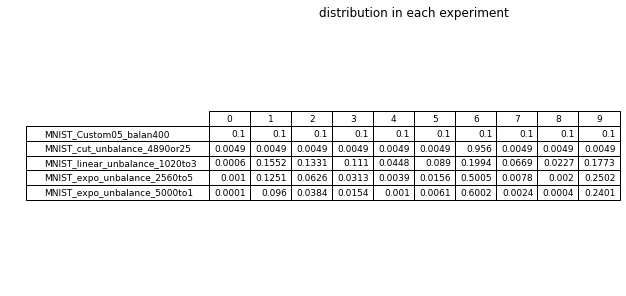

In [102]:
distribution[permutation]
rows = experment_names
columns = [str(x) for x in range(0,10)]
d = np.array(distributions)[:,permutation]
d = np.around(d / np.reshape(np.sum(d,1), (5,1)), 4)
plot_table('distribution in each experiment', rows, columns, d)
    

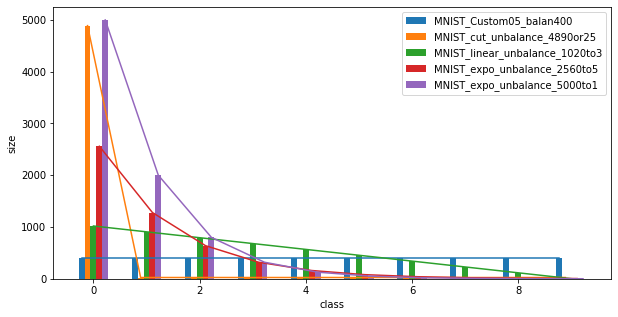

In [119]:
width = 2 / len(shapes)
x = np.arange(10) - len(shapes) * width / 9
i = 0

fig, ax = plt.subplots(figsize=(10, 5))
for shape in distributions:
    ax.bar(x + i*width, shape, width, label=experment_names[i])
    ax.plot(x + i*width, shape)
    i = i + 1
plt.xlabel('class')
plt.ylabel('size')
ax.legend()

In [69]:
len(rows)

4

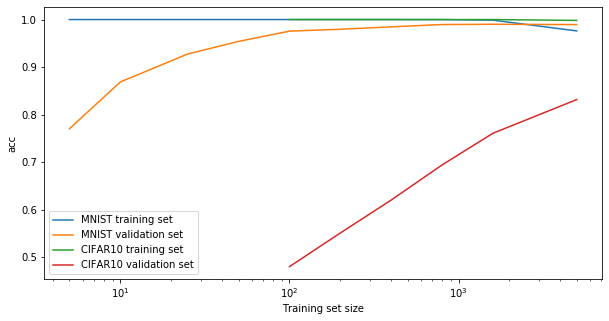

In [117]:
sizes = np.array([5000, 1600, 800, 400, 200, 100, 50, 25, 10, 5])
sizes_2 = np.array([5000, 1600, 800, 400, 200, 100])
acc_val = [0.9894, 0.9901, 0.9895, 0.9847, 0.9796, 0.9756, 0.954, 0.9275, 0.8687, 0.7703]
acc_train = [0.9761, 0.9987, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
acc_val_2 = [0.8316, 0.7609, 0.6942, 0.6203, 0.5509, 0.4801]
acc_train_2 = [0.9982, 1.0, 1.0, 1.0, 1.0, 1.0]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(sizes, acc_train, label = "MNIST training set")
ax.plot(sizes, acc_val, label = "MNIST validation set")
ax.plot(sizes_2, acc_train_2, label = "CIFAR10 training set")
ax.plot(sizes_2, acc_val_2, label = "CIFAR10 validation set")
plt.xscale('log')
plt.xlabel('Training set size')
plt.ylabel('acc')
ax.legend()

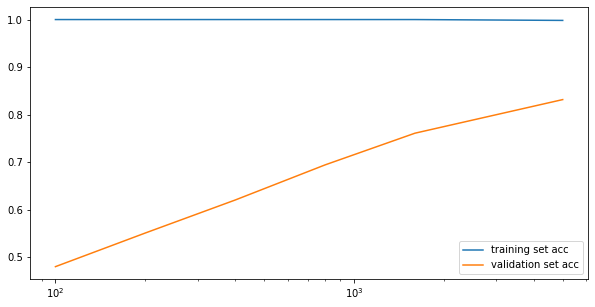

In [108]:


fig, ax = plt.subplots(figsize=(10, 5))

plt.xscale('log')
ax.legend()

In [61]:
m = np.load("MNIST_2560to5_rescaled/result_outputs/confusion_matrix.npy")

In [62]:
#Sensitivity
Sensitivity = np.sum(np.eye(10)* m,1) / np.sum(m,1)

<BarContainer object of 10 artists>

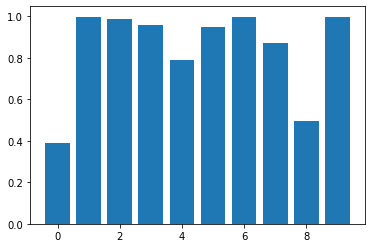

In [63]:
plt.bar(x = np.arange(10), height = Sensitivity)

<BarContainer object of 10 artists>

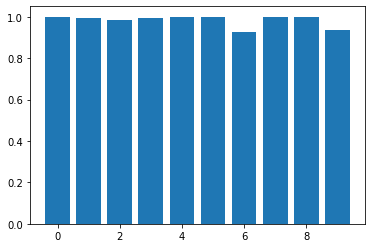

In [64]:
#Specificity
Specificity = np.zeros((10,))
for i in range(0,10):
    temp = np.sum(m,1)
    all_negtive = np.sum(temp) - temp[i]
    false_positive = np.sum(m[:,i]) - m[i,i]
    Specificity[i] = (all_negtive - false_positive) / all_negtive
plt.bar(x = np.arange(10), height = Specificity)

In [41]:
m.astype(int)

array([[ 595,    7,   11,    0,    0,    5,  267,    1,    0,   94],
       [   0, 1130,    2,    0,    0,    0,    2,    0,    0,    1],
       [   0,    5, 1019,    0,    0,    0,    4,    3,    0,    1],
       [   0,    1,    5,  987,    0,   10,    0,    2,    0,    5],
       [   0,    4,    1,    0,  786,    0,   25,    0,    0,  166],
       [   0,    3,    0,   11,    0,  843,   24,    1,    0,   10],
       [   0,    2,    0,    0,    0,    1,  954,    0,    0,    1],
       [   0,   15,   55,    6,    0,    0,    0,  877,    0,   75],
       [   1,    8,   28,   25,    7,    7,   94,    2,  575,  227],
       [   0,    0,    0,    0,    0,    0,    3,    1,    0, 1005]])

In [42]:
Sensitivity1 = Sensitivity
Specificity1 = Specificity

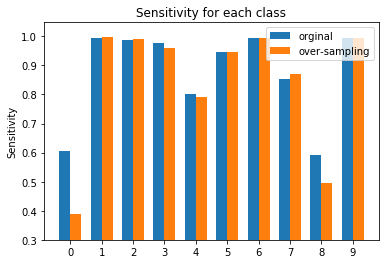

In [69]:
x = np.arange(10)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Sensitivity1, width, label='orginal')
rects2 = ax.bar(x + width/2, Sensitivity, width, label='over-sampling')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sensitivity')
ax.set_title('Sensitivity for each class')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.set_ylim(bottom= 0.3)
ax.legend()
plt.savefig("test2.pdf")

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from setting import *
from numpy import genfromtxt
result = "result_outputs/test_summary.csv"

In [47]:
# load cosen results

MNIST_dic = {}
CIFAR10_dic = {}
mnist_distributions = [LINEAR, EXPONENTIAL, "mu_0.2", "mu_0.5", "mu_0.8"]
cifar10_distribution = [LINEAR, EXPONENTIAL, "mu_0.2", "mu_0.5", "mu_0.8"]
methods = [FLAT, ROS, COSEN, HIERARCHICAL]
for d in mnist_distributions:
    MNIST_dic[d] = {}
    for m in methods:
        MNIST_dic[d][m] = {}
for d in cifar10_distribution:
    CIFAR10_dic[d] = {}
    for m in methods:
        CIFAR10_dic[d][m] = {}

result = "result_outputs/test_summary.csv"
result_hier = "whole_system_test/result_outputs/test_summary.csv"
lr_list = ["0.5", "0.2", "0.1", "0.05", "0.02"]
permutations = [0, 1, 2, 3, 4]
best_lr_dic = {}

def cosen_load_data(experiment_dir, dic, distribution, method, p_list):
    result = "result_outputs/test_summary.csv"
    for p in p_list:
        best = 0.0
        best_lr = ""
        for lr in lr_list:
            total = 0.0
            for i in range(len(permutations)):
                result_path = os.path.join(experiment_dir, "p_" + str(p), distribution, method, str(i+1), lr, result) 
                if not (os.path.isfile(result_path)):
                    continue
                my_data = genfromtxt(result_path, delimiter=',')
                total += my_data[1][2]
            if total > best:
                best =total
                best_lr = lr
        best_lr_dic[best_lr] = best_lr_dic.get(best_lr, 0)+1
        dic[distribution][method][p] = best / len(permutations)

def load_data(experiment_dir, dic, distribution, method, p_list, result = "result_outputs/test_summary.csv"):
    for p in p_list:
        total = 0.0
        for i in range(len(permutations)):
            result_path = os.path.join(experiment_dir, "p_" + str(p), distribution, method, str(i+1),result) 
            if not (os.path.isfile(result_path)):
                continue
            my_data = genfromtxt(result_path, delimiter=',')
            total += my_data[1][2]
        dic[distribution][method][p] = total / len(permutations)

experiment_dir = "experiments/MNIST"

best_lr_dic = {}

for d in mnist_distributions:
    for m in methods:
        if (m == COSEN):
            cosen_load_data(experiment_dir, MNIST_dic, d, m, p_MNIST)
        elif (m == HIERARCHICAL):
            load_data(experiment_dir, MNIST_dic, d, m, p_MNIST, result_hier)
        else:
            load_data(experiment_dir, MNIST_dic, d, m, p_MNIST)
best_lr_dic_MNIST = best_lr_dic
best_lr_dic = {}
experiment_dir = "experiments/CIFAR10"

permutations = [0]
for d in cifar10_distribution:
    for m in methods:
        if (m == COSEN):
            cosen_load_data(experiment_dir, CIFAR10_dic, d, m, p_CIFAR10)
        elif (m == HIERARCHICAL):
            load_data(experiment_dir, CIFAR10_dic, d, m, p_CIFAR10, result_hier)
        else:
            load_data(experiment_dir, CIFAR10_dic, d, m, p_CIFAR10)
best_lr_dic_CIFAR10 = best_lr_dic

In [32]:
best_lr_dic_MNIST

{'0.2': 5, '0.02': 9, '0.1': 18, '0.05': 12, '0.5': 1}

In [33]:
best_lr_dic_CIFAR10

{'0.1': 6, '0.2': 12, '0.02': 1, '0.05': 1}

In [16]:
MNIST_dic[EXPONENTIAL][COSEN]

{10: 0.9906596394661411,
 25: 0.9870041110076713,
 50: 0.9808159371648303,
 100: 0.9780833172056702,
 250: 0.9607942207061942,
 500: 0.9446983856460018,
 1000: 0.9049417368785326,
 2000: 0.8496073778792587,
 4000: 0.7993552669904915}

In [17]:
MNIST_dic[EXPONENTIAL][ROS]

{10: 0.9907006590476947,
 25: 0.9867907847871085,
 50: 0.9813304105638085,
 100: 0.9770520734434125,
 250: 0.9614418259793183,
 500: 0.9341008431856578,
 1000: 0.8892906084739135,
 2000: 0.8454528023541645,
 4000: 0.7976571992160458}

In [18]:
MNIST_dic[EXPONENTIAL][FLAT]

{10: 0.9894415543117013,
 25: 0.9850966717578947,
 50: 0.9751256226109632,
 100: 0.9730484815399599,
 250: 0.9429171350733888,
 500: 0.9219506926673258,
 1000: 0.8331979852620719,
 2000: 0.7814587670508025,
 4000: 0.7389088563577805}

In [19]:
MNIST_dic[EXPONENTIAL][HIERARCHICAL]

{10: 0.9841527744554112,
 25: 0.9767464693974756,
 50: 0.970353224555802,
 100: 0.9567443733425159,
 250: 0.9333817814435307,
 500: 0.9126084189529081,
 1000: 0.8754066926649202,
 2000: 0.8294277175576402,
 4000: 0.7985822348643788}

In [34]:
def draw(distribution):
    ratio = [10, 25, 50, 100, 250, 500, 1000, 2000, 4000]
    fig, ax = plt.subplots(figsize=(10, 5))

    for m in methods:
        x = list(MNIST_dic[distribution][m].keys())
        y = list(MNIST_dic[distribution][m].values())
        ax.plot(x, y, label = m)

    plt.xscale('log')
    plt.xlabel('Imbalance ratio')
    plt.ylabel('acc')
    ax.legend()

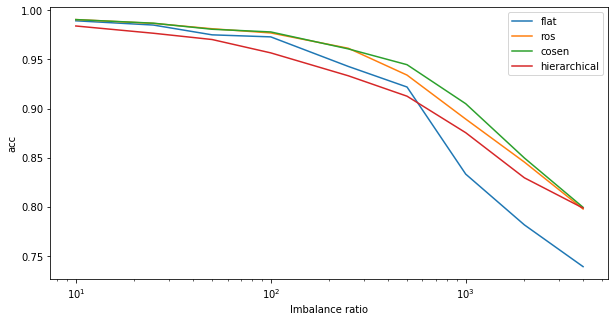

In [35]:
draw(EXPONENTIAL)

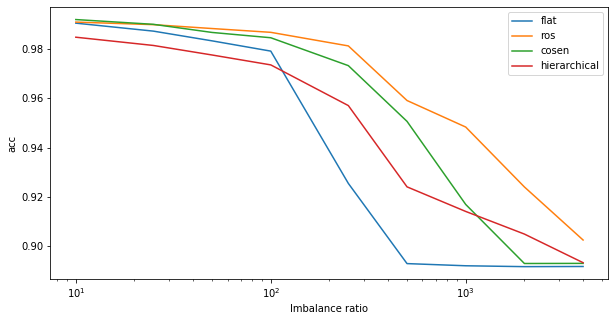

In [36]:
draw(LINEAR)

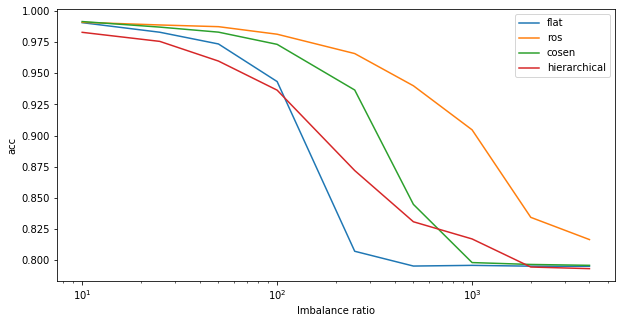

In [37]:
draw("mu_0.2")

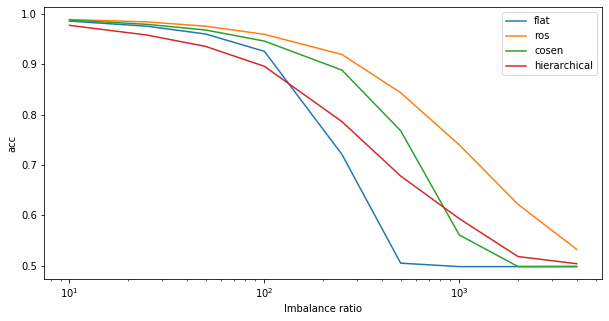

In [38]:
draw("mu_0.5")

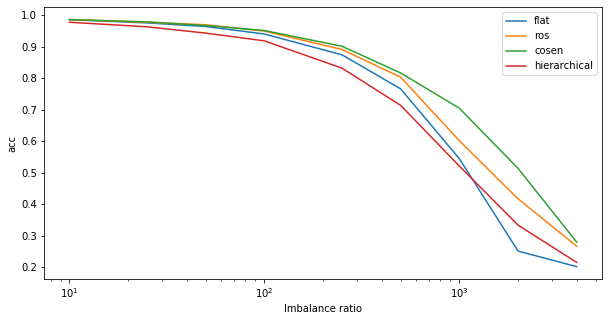

In [39]:
draw("mu_0.8")

In [41]:
def draw_CIFAR10(distribution):
    ratio = [2, 10, 20, 40]
    fig, ax = plt.subplots(figsize=(10, 5))

    for m in methods:
        x = list(CIFAR10_dic[distribution][m].keys())
        y = list(CIFAR10_dic[distribution][m].values())
        ax.plot(x, y, label = m)

    plt.xscale('log')
    plt.xlabel('Imbalance ratio')
    plt.ylabel('acc')
    ax.legend()

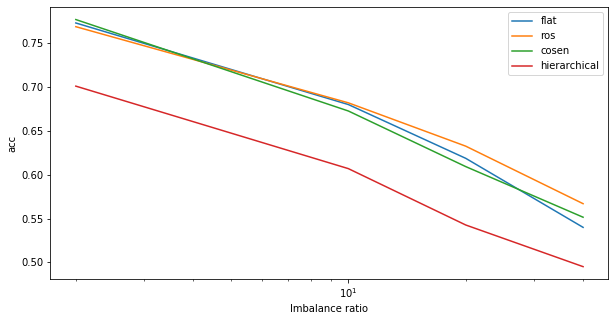

In [48]:
draw_CIFAR10(EXPONENTIAL)

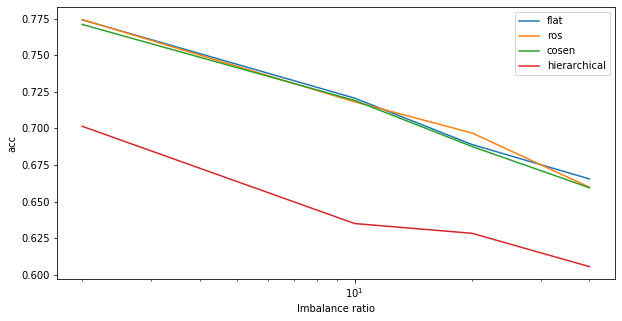

In [49]:
draw_CIFAR10(LINEAR)

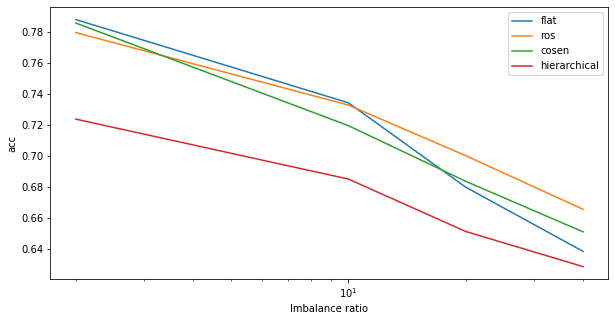

In [50]:
draw_CIFAR10("mu_0.2")

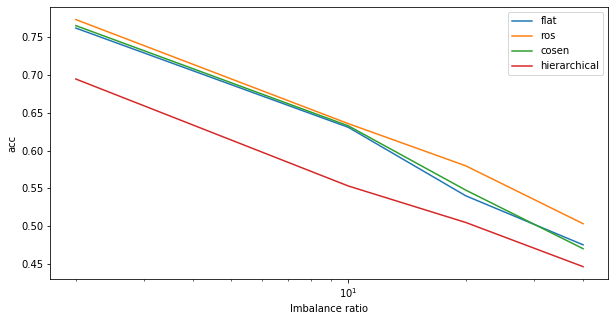

In [51]:
draw_CIFAR10("mu_0.5")

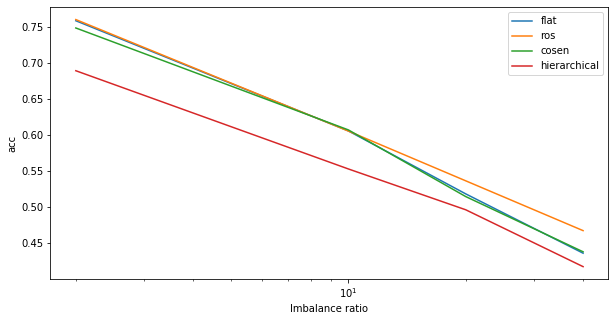

In [52]:
draw_CIFAR10("mu_0.8")

In [51]:
list(MNIST_dic[EXPONENTIAL][m].keys())

[10, 25, 50, 100, 250, 500, 1000, 2000, 4000]

In [47]:
MNIST_dic[EXPONENTIAL][HIERARCHICAL].keys()

dict_keys([10, 25, 50, 100, 250, 500, 1000, 2000, 4000])